<a href="https://colab.research.google.com/github/RavivKerner/test/blob/loss/Copy_of_FR6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 35.7 MB/s 
     |████████████████████████████████| 189 kB 59.1 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 327 kB/s 
Mounted at /content/gdrive


Key Loss func & matrics by fastai 

Regression : 
MSE for loss and matric (TO DO: add all function)

#Classification Models:

##Binary classification models:

### Loss and accuracy build by me:

In [2]:
def Binary_cls_loss(preds,y):
  preds = sigmoid(preds)
  return torch.where(y==1, y-preds, preds).mean()

def Binary_metric_accuracy(preds, y, threshhold=0.5):
  pred_accuracy = (sigmoid(preds)>threshhold)
  return (pred_accuracy==y).float().mean()


### Loss and accuracy build in fastai chpter 4 (same as mine):

In [3]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

### Comaring both solutions:

Creater small test set for binary classification:

In [4]:
preds = tensor([ 9.4077, -1.3319,  9.3460,  5.9358])
y = tensor([1, 1, 0, 0])

loss functions test:

In [5]:
Binary_cls_loss(preds, y)==mnist_loss(preds, y)

tensor(True)

Accuracy functions test:

In [6]:
Binary_metric_accuracy(preds, y) == batch_accuracy(preds, y)

tensor(True)

There are no use of standart function during this chapter for simplification, later on chapter 6 has all the standrt functions names, for this case we shuold use nn.BCEWithLogitsLoss as its for Binary classifcations and includes sigmoid: 

In [7]:
binary_loss_func = nn.BCEWithLogitsLoss()

In [9]:
binary_loss_func(preds, y.float()) == Binary_cls_loss(preds, y) #added .float() to convert for the correct type 

tensor(False)

The values are not the same as the standart function includes negtive log on the results as it improves the optimization process, we will add negative log for verification:

In [10]:
def Binary_cls_loss_log(preds,y):
  preds = sigmoid(preds)
  return -np.log(1-torch.where(y==1, y-preds, preds)).mean()

In [12]:
binary_loss_func(preds, y.float()), Binary_cls_loss_log(preds, y)

(tensor(4.2127), tensor(4.2128))

Further research : In the last example, in the chapter F.cross_entropy wheconstruction the cnn_learner, it will be intresting to learn why and whats the difference from the standard Binary function 

## Multiclass classification

### Loss and accuracy build by me:

In [6]:
def softmaxp1(preds):
  sume = np.exp(preds).sum(1)
  return np.exp(preds)/sume.reshape((len(preds),1))

def multi_c_loss(preds, y):
  soft = softmaxp1(preds)
  softcon = np.log(soft)*-1
  idx = range(len(y))
  return softcon[idx, y].mean() #choosing for row idx the value at column y 

def multi_accuracy(preds, y):
  to_C = preds.argmax(1)
  return (to_C==y).float().mean()


### Loss and accuracy build in fastai chpter 5 (same as mine):

In [14]:
def softmax(x): return np.exp(x) / np.exp(x).sum(dim=1, keepdim=True)

In [ ]:
def softmax(x): return np.exp(x) / np.exp(x).sum(dim=1, keepdim=True)

F.nll_loss(sm_acts, targ, reduction='none') #negative log likelihood (but it asumed you already took the log...)
#(its because pytorch desgin log_softmax function which take soft_max and log together)
#the 'reduction = None ' io show per row and not average, by default all loss function in Pytorch takes the mean

F.cross_entropy(acts, targ) #softmax+negative log likelihood
# which, in practice, actually does log_softmax and then nll_loss

In [30]:
y = tensor([0, 1, 1, 2, 3])
preds =tensor([[15.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 10.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [16]:
softmax(preds)==softmaxp1(preds)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [ ]:
def multi_accuracy(preds, y):
  to_C = preds.argmax(1)
  return (to_C==y).float().mean()

In [15]:
preds2 = softmaxp1(preds)
preds2

tensor([[9.9677e-01, 1.2609e-03, 6.1606e-06, 1.9639e-03],
        [1.5190e-02, 1.2460e-01, 3.9822e-03, 8.5622e-01],
        [5.0722e-01, 1.5773e-04, 4.7687e-01, 1.5753e-02],
        [7.4715e-01, 3.6579e-02, 2.0709e-01, 9.1731e-03],
        [8.9111e-01, 3.9530e-02, 1.8292e-03, 6.7530e-02]])

In [16]:
to_C = preds2.argmax(1)
to_C

tensor([0, 3, 0, 0, 0])

In [19]:
(to_C==y).float().mean()

tensor(0.2000)

In [33]:
multi_accuracy(preds, y).float()

tensor(0.4000)

In [34]:
error_rate(preds, y).float()

TensorBase(0.6000)

In [25]:
(1-error_rate(preds, y))

TensorBase(0.2000)

In [28]:
(multi_accuracy(preds, y)-0)

tensor(0.2000)

In [27]:
(1-error_rate(preds, y))== (multi_accuracy(preds, y)-0)

TensorBase(False)

In [ ]:
y = tensor([0, 1, 1, 2, 3])

In [18]:
F.cross_entropy(preds, y), multi_c_loss(preds, y)

(tensor(3.3246), tensor(3.3246))

In [ ]:
F.nll_loss(preds, y, reduction='none') #negative log likelihood (but it asumed you already took the log...)
#(its because pytorch degin log_softmax function which take soft_max and log together)

tensor([-8.8227, -6.0090, -1.3319, -7.4109, -6.2745])

In [ ]:
loss_func_nn = nn.CrossEntropyLoss(reduction='none')

In [ ]:
multi_c_loss(multipredsf, y), F.cross_entropy(multipredsf,y), loss_func_nn(multipredsf,y) #dont work directly like F

(tensor(3.3246),
 tensor(3.3246),
 tensor([1.5161, 2.0826, 8.7546, 1.5746, 2.6952]))

In [ ]:
softmax(preds) == softmaxp1(preds)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [8]:
error_rate(preds, y), multi_accuracy(preds, y)

(TensorBase(1.), tensor(0.))

In [ ]:
multi_accuracy(preds, y)

In [ ]:
#how to sofmax of multiple array (sum and divide row by row)V
#name of all functionsV
#didnt show accuracy function

In [ ]:
#Multi label

In [48]:
def multi_l_loss(preds, y):
  sig = sigmoid(preds)
  dist = (sig-y).abs()
  return -np.log(1-dist).mean()

def multi_l_accuracy(preds, y, th=0.5):
  sig_preds = sigmoid(preds)
  bin_conv = (sig_preds>th).float()
  return (bin_conv==y).float().mean()

In [ ]:
#####best to make a table out of it

# F.binary_cross_entropy and its module equivalent nn.BCELoss calculate cross-entropy on a one-hot-encoded target, but do not include the initial sigmoid
# F.binary_cross_entropy_with_logits (or nn.BCEWithLogitsLoss) include sigmoid 

# The equivalent for single-label datasets (like MNIST or the Pet dataset), where the target is encoded as a single integer,
#  is F.nll_loss or nn.NLLLoss for the version without the initial softmax, 
#  and F.cross_entropy or nn.CrossEntropyLoss for the version with the initial softmax.

def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    inp = sigmoid(inp)
    targ = targ.bool()
    return ((inp>thresh)==targ).float().mean()

In [ ]:
preds =tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

y =tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])

In [ ]:
y.dtype #standart pytorch wont work, need to change to float

torch.int64

In [ ]:
preds

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
lss = nn.BCEWithLogitsLoss()

In [ ]:
multi_l_loss(preds,y), lss(preds,y.float())

(tensor(4.5089), tensor(4.5089))

In [ ]:
accuracy_multi(preds, y), multi_l_accuracy(preds, y)

(TensorBase(0.3500), tensor(0.3500))

In [ ]:
F.binary_cross_entropy_with_logits(preds,y)

RuntimeError: ignored

In [ ]:
pdb.set_trace()
multi_l_accuracy(multipredsf,y)

In [ ]:
from fastai.vision.all import *

In [ ]:
import pdb

In [ ]:
# pdb.set_trace()
accuracy_multi(multipredsf,y)

TensorBase(0.3500)

In [ ]:
accuracy_multi??

In [ ]:
flatten_check??

In [ ]:
((inp>0.5)==y.bool()).float().mean()

tensor(0.3500)

In [ ]:
inp=sigmoid(multipredsf)
inp

tensor([[0.9999, 0.9999, 0.9787, 0.9999],
        [0.9802, 0.9975, 0.9286, 0.9996],
        [0.9999, 0.7912, 0.9999, 0.9974],
        [0.9998, 0.9966, 0.9994, 0.9865],
        [0.9999, 0.9968, 0.9350, 0.9981]])

In [ ]:
y.bool()

tensor([[ True, False, False, False],
        [ True,  True, False, False],
        [False, False, False, False],
        [False, False, False,  True],
        [False,  True,  True,  True]])

In [ ]:
def Binary_cls_loss(preds,y):
  preds = sigmoid(preds)
  return torch.where(y==1, y-preds, preds).mean()

In [ ]:
Binary_cls_loss(randres, y)

tensor(0.6971)

In [ ]:
(sigmoid(randres)-y).abs().mean()

tensor(0.6971)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


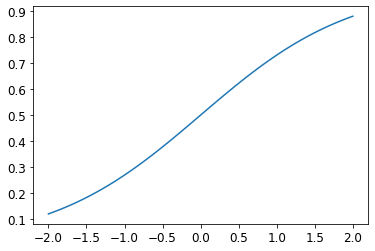

In [ ]:
plot_function(sigmoid)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


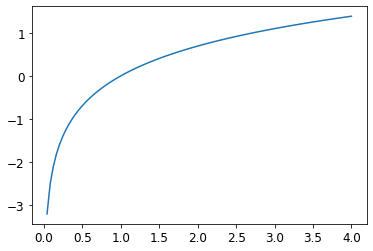

In [ ]:
plot_function(torch.log, min=0,max=4)

In [ ]:
def Binary_metric_accuracy(preds, y, threshhold=0.5):
  pred_accuracy = sigmoid(preds)>threshhold
  return (pred_accuracy==y).float().mean()



In [ ]:
((sigmoid(preds)>0.5).float()==y).float().mean()

tensor(0.2500)

In [ ]:
Binary_metric_accuracy(preds, y)

tensor(0.2500)

In [ ]:
#Names of the torch fuctions???????????????????????????????????? for both of them!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
#Multi class

In [ ]:
y = tensor([1, 2, 2, 3])
y

tensor([1, 2, 2, 3])

In [ ]:
preds

tensor([ 9.4077, -1.3319,  9.3460,  5.9358])

In [ ]:
preds2 = tensor([ 9.4077, -1.3319,  2.3460,  3.9358])

In [ ]:
def softmaxp1(preds):
  sume = np.exp(preds).sum(1)
  # sume.reshape((len(preds),1))
  return np.exp(preds)/sume.reshape((len(preds),1))

In [ ]:
multiperds = torch.rand((5,4))*10

In [ ]:
multiperds

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [3]:
multipredsf =tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [4]:
multipredsf

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
sf = softmaxp1(multipredsf)
sf

tensor([[2.1956e-01, 3.0457e-01, 1.4881e-03, 4.7438e-01],
        [1.5190e-02, 1.2460e-01, 3.9822e-03, 8.5622e-01],
        [5.0722e-01, 1.5773e-04, 4.7687e-01, 1.5753e-02],
        [7.4715e-01, 3.6579e-02, 2.0709e-01, 9.1731e-03],
        [8.9111e-01, 3.9530e-02, 1.8292e-03, 6.7530e-02]])

In [ ]:
logsf = np.log(sf)*-1
logsf

tensor([[1.5161, 1.1888, 6.5102, 0.7457],
        [4.1871, 2.0826, 5.5259, 0.1552],
        [0.6788, 8.7546, 0.7405, 4.1507],
        [0.2915, 3.3083, 1.5746, 4.6915],
        [0.1153, 3.2307, 6.3039, 2.6952]])

In [ ]:
np.exp(-1.5161)

0.21956652877963362

In [ ]:
y = tensor([0, 1, 1, 2, 3])

In [ ]:
y

tensor([0, 1, 1, 2, 3])

In [ ]:
idx = range(len(y))

In [ ]:
logsf[idx,y].mean()

tensor(3.3246)

In [5]:
multipredsf

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
multipredsf[idx, y].mean(), multipredsf[idx, y]

(tensor(5.9698), tensor([8.8227, 6.0090, 1.3319, 7.4109, 6.2745]))

In [ ]:
multipredsf

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
def multi_c_loss(preds, y):
  soft = softmaxp1(preds)
  softcon = np.log(soft)*-1
  idx = range(len(y))
  return softcon[idx, y].mean()


In [ ]:
multi_loss(multipredsf, y)

tensor(3.3247)

In [ ]:
multipredsf

tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
((multipredsf.argmax(1)==y).float()).mean()

tensor(0.)

In [ ]:
def multi_accuracy(preds, y):
  to_C = preds.argmax(1)
  return (to_C==y).float().mean()

In [ ]:
multi_accuracy(multipredsf, y)

tensor(0.)

In [ ]:
#multi label*********************************

In [ ]:
multipredsf =tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

y =tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])


tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [ ]:
y =tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])
y

tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])

In [ ]:
sig = sigmoid(multipredsf)
sig

tensor([[0.9999, 0.9999, 0.9787, 0.9999],
        [0.9802, 0.9975, 0.9286, 0.9996],
        [0.9999, 0.7912, 0.9999, 0.9974],
        [0.9998, 0.9966, 0.9994, 0.9865],
        [0.9999, 0.9968, 0.9350, 0.9981]])

In [ ]:
1-((sigmoid(multipredsf)-y).abs())

tensor([[9.9985e-01, 1.0622e-04, 2.1277e-02, 6.8188e-05],
        [9.8025e-01, 9.9755e-01, 7.1379e-02, 3.5739e-04],
        [8.2135e-05, 2.0885e-01, 8.7261e-05, 2.6361e-03],
        [1.6761e-04, 3.4114e-03, 6.0427e-04, 9.8653e-01],
        [1.4269e-04, 9.9679e-01, 9.3498e-01, 9.9812e-01]])

In [ ]:
def multi_l_loss(preds, y):
  sig = sigmoid(preds)
  dist = (sig-y).abs()
  return -np.log(1-dist).mean()


In [ ]:
def multi_l_accuracy(preds, y, th=0.5):
  sig_preds = sigmoid(preds)
  bin_conv = (sig_preds>th).float()
  return (bin_conv==y).float().mean()

In [ ]:
multi_l_accuracy(multipredsf, y)

tensor(0.3500)

In [ ]:
multi_l_loss(multipredsf, y)

tensor(4.5089)

In [ ]:
y

tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])

In [ ]:
(sigmoid(multipredsf)-y).abs()

tensor([[1.4734e-04, 9.9989e-01, 9.7872e-01, 9.9993e-01],
        [1.9753e-02, 2.4505e-03, 9.2862e-01, 9.9964e-01],
        [9.9992e-01, 7.9115e-01, 9.9991e-01, 9.9736e-01],
        [9.9983e-01, 9.9659e-01, 9.9940e-01, 1.3466e-02],
        [9.9986e-01, 3.2076e-03, 6.5022e-02, 1.8802e-03]])

In [ ]:
(-np.log(1-((sigmoid(multipredsf)-y).abs()))).mean()

tensor(4.5089)

In [ ]:
torch.where(y==1, 1-sig, sig)

tensor([[1.4734e-04, 9.9989e-01, 9.7872e-01, 9.9993e-01],
        [1.9753e-02, 2.4505e-03, 9.2862e-01, 9.9964e-01],
        [9.9992e-01, 7.9115e-01, 9.9991e-01, 9.9736e-01],
        [9.9983e-01, 9.9659e-01, 9.9940e-01, 1.3466e-02],
        [9.9986e-01, 3.2076e-03, 6.5022e-02, 1.8802e-03]])

In [ ]:
(sigmoid(multipredsf)-y).abs()

tensor([[1.4734e-04, 9.9989e-01, 9.7872e-01, 9.9993e-01],
        [1.9753e-02, 2.4505e-03, 9.2862e-01, 9.9964e-01],
        [9.9992e-01, 7.9115e-01, 9.9991e-01, 9.9736e-01],
        [9.9983e-01, 9.9659e-01, 9.9940e-01, 1.3466e-02],
        [9.9986e-01, 3.2076e-03, 6.5022e-02, 1.8802e-03]])

In [ ]:
A = tensor([[1, 2, 2, 3], [2,4,8,2]])
A

tensor([[1, 2, 2, 3],
        [2, 4, 8, 2]])

In [ ]:
1-A


tensor([[ 0, -1, -1, -2],
        [-1, -3, -7, -1]])